In [ ]:
#El punto y coma es para que la descarga se ejecute en segundo plano y no muestre la molesta celda
#El argumento -q de unzip sirve para que se active el modo quiet y también hace que no se muestre la salida normal

In [1]:
!gdown 1vtZat_H7an2LtXKvo5WQbdXjyJaNdd_u;
!unzip -q Imagenes.zip

Access denied with the following error:



 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1vtZat_H7an2LtXKvo5WQbdXjyJaNdd_u; 

unzip:  cannot find either Imagenes.zip or Imagenes.zip.zip.


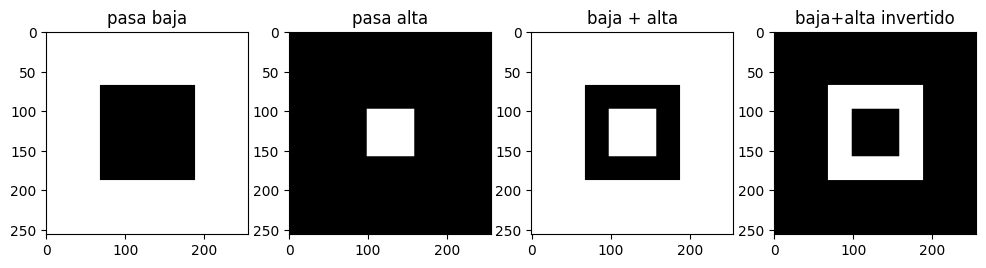

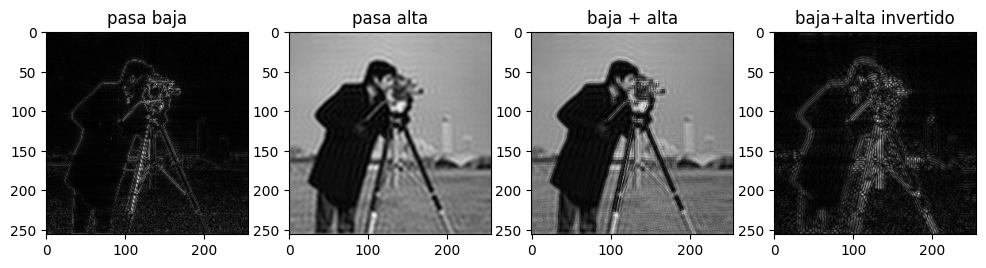

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Leer la imagen en escala de grises
im = cv2.imread('Imagenes/cameraman.tif', 0)

# Calcular la transformada de Fourier de la imagen
f = np.fft.fft2(im)
fshift = np.fft.fftshift(f)

# Obtener el tamaño de la imagen
rows, cols = im.shape
crow, ccol = rows//2, cols//2

# Filtro de pasa baja
support_lp = 60
mask_lp = np.ones((rows, cols))
mask_lp[crow-support_lp:crow+support_lp, ccol-support_lp:ccol+support_lp] = 0

# Filtro de pasa alta
support_hp = 30
mask_hp = np.zeros((rows, cols))
mask_hp[crow-support_hp:crow+support_hp, ccol-support_hp:ccol+support_hp] = 1

# Combinar los filtros
mask_combined1 = mask_lp + mask_hp
# Invertir los colores
mask_combined2 = np.where(mask_combined1 == 0, 1, 0)

# Mostrar las máscaras
plt.figure(figsize=(12,12))
plt.subplot(2, 4, 1), plt.imshow(255*mask_lp, cmap='gray')
plt.title('pasa baja')
plt.subplot(2, 4, 2), plt.imshow(255*mask_hp, cmap='gray')
plt.title('pasa alta')
plt.subplot(2, 4, 3), plt.imshow(255*mask_combined1, cmap='gray')
plt.title('baja + alta')
plt.subplot(2, 4, 4), plt.imshow(255*mask_combined2, cmap='gray')
plt.title('baja+alta invertido')
plt.show()

# Aplicar la máscara combinada
fshift_filtered1 = fshift * mask_combined1
fshift_filtered2 = fshift * mask_combined2
fshift1 = fshift * mask_lp
fshift2 = fshift * mask_hp

# Calcular la transformada inversa de Fourier
f_ishift1 = np.fft.ifftshift(fshift1)
im_back1 = np.fft.ifft2(f_ishift1)
im_back1 = np.abs(im_back1)

f_ishift2 = np.fft.ifftshift(fshift2)
im_back2 = np.fft.ifft2(f_ishift2)
im_back2 = np.abs(im_back2)

f_ishift1 = np.fft.ifftshift(fshift_filtered1)
im_back3 = np.fft.ifft2(f_ishift1)
im_back3 = np.abs(im_back3)

f_ishift2 = np.fft.ifftshift(fshift_filtered2)
im_back4 = np.fft.ifft2(f_ishift2)
im_back4 = np.abs(im_back4)

# Mostrar las imágenes resultantes
plt.figure(figsize=(12,12))
plt.subplot(2, 4, 5), plt.imshow(im_back1, cmap='gray')
plt.title('pasa baja')
plt.subplot(2, 4, 6), plt.imshow(im_back2, cmap='gray')
plt.title('pasa alta')
plt.subplot(2, 4, 7), plt.imshow(im_back3, cmap='gray')
plt.title('baja + alta')
plt.subplot(2, 4, 8), plt.imshow(im_back4, cmap='gray')
plt.title('baja+alta invertido')
plt.show() 